In [14]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [15]:
df = pd.read_csv('phone_demo.csv')
df.head()

,Age,Income,Education,Phone Preference
0,22,0,Diploma,iPhone
1,24,2700,Degree,iPhone
2,61,1200,High School,Samsung
3,66,3000,Degree,Samsung
4,24,0,Diploma,Samsung


In [16]:
df.shape

(22, 4)

In [17]:
X = df[['Age', 'Income', 'Education']].values
X[0:5]

array([[22, 0, 'Diploma'],
       [24, 2700, 'Degree'],
       [61, 1200, 'High School'],
       [66, 3000, 'Degree'],
       [24, 0, 'Diploma']], dtype=object)

In [18]:
from sklearn import preprocessing

In [19]:
Education = preprocessing.LabelEncoder()
Education.fit([ 'High School', 'Diploma', 'Degree'])
X[:,2] = Education.transform(X[:,2])


In [20]:
X[0:5]

array([[22, 0, 1],
       [24, 2700, 0],
       [61, 1200, 2],
       [66, 3000, 0],
       [24, 0, 1]], dtype=object)

In [21]:
y = df["Phone Preference"]
y[0:5]

0     iPhone
1     iPhone
2    Samsung
3    Samsung
4    Samsung
Name: Phone Preference, dtype: object

In [22]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

In [34]:
phoneTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
phoneTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
phoneTree.fit(X_trainset,y_trainset)
predTree = phoneTree.predict(X_testset)

In [36]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


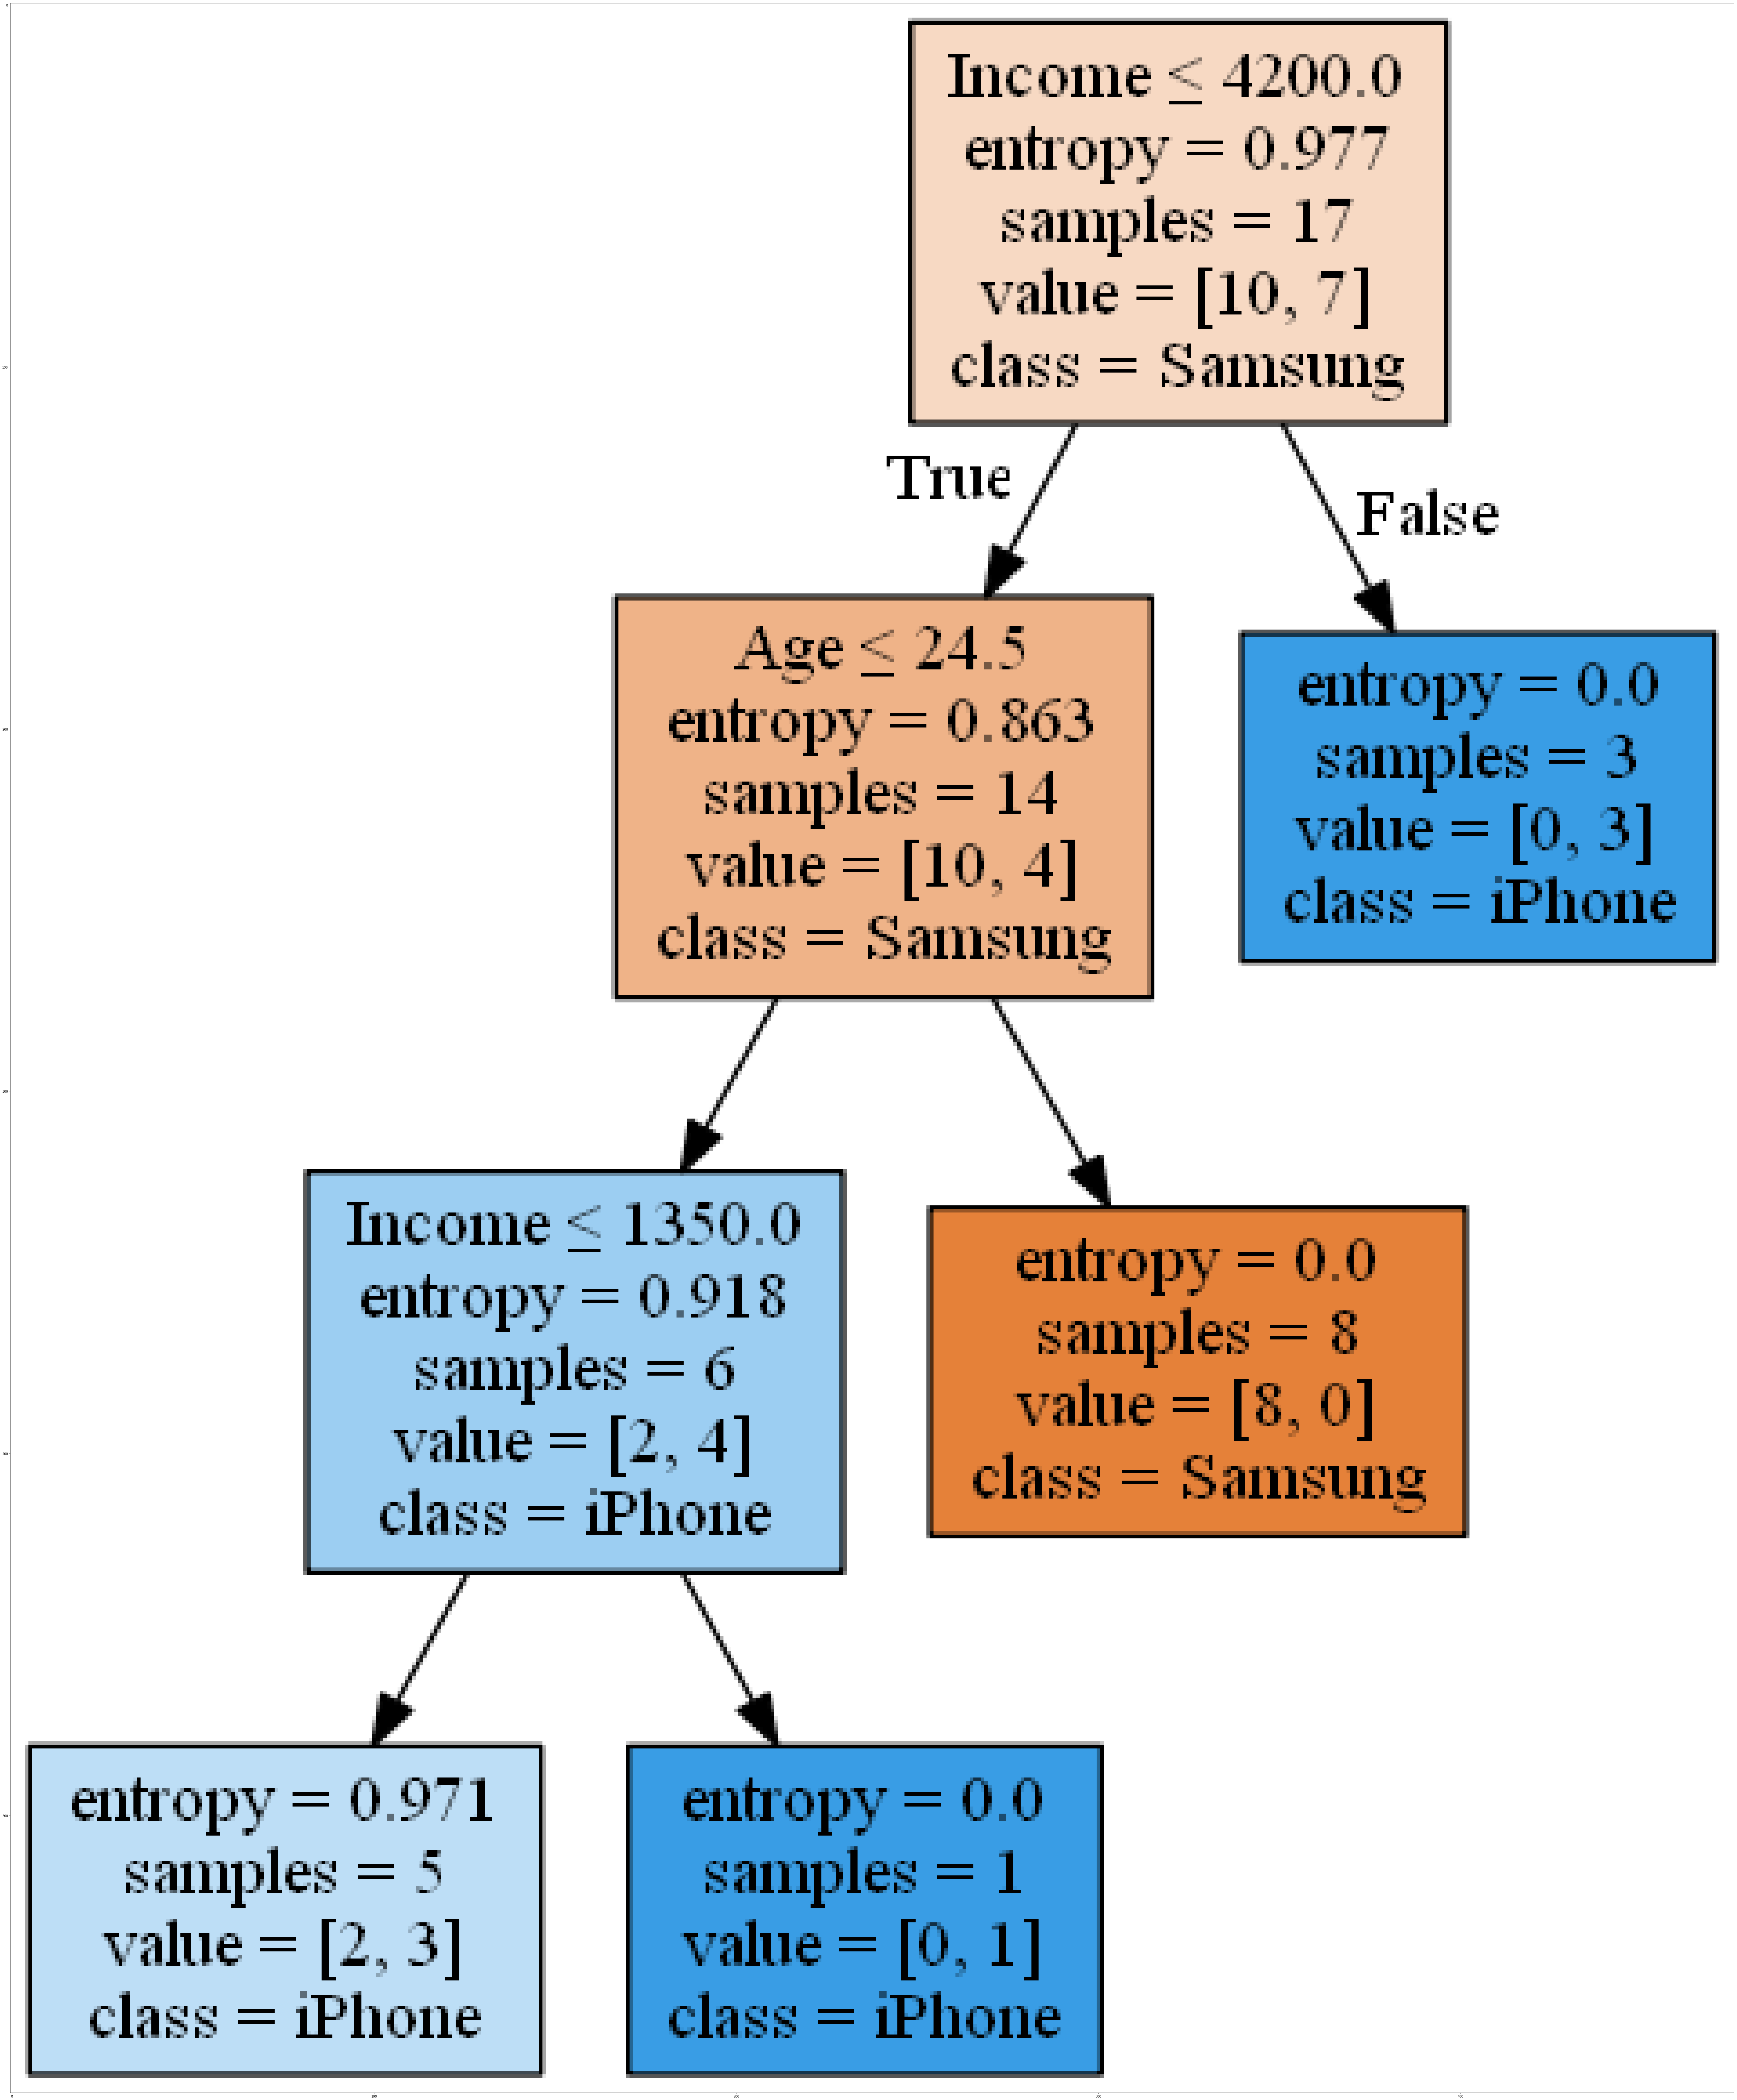

In [39]:
dot_data = StringIO()
filename = "phoneTree.png"
featureNames = df.columns[0:3]
targetNames = df["Phone Preference"].unique().tolist()
out=tree.export_graphviz(phoneTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')